<font color = red>**QBS Competition 1 - Code Part**</font>  
For your information, texts with blue color are titles, those with green are findings and comments, and those with black are just some descriptions.

**<font color = blue>Step 1 : Import Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x_train = pd.read_csv("train.csv", usecols = range(15))
x_test = pd.read_csv("test.csv")
y_train = pd.read_csv("train.csv", usecols = [15])

# Combine x_train and x_test in order to explore data and tackle with missing value later
x_data = x_train.append(x_test)

**<font color = blue> Step 2: Data exploring and preprocessing**

I only included the parts that I adjusted the data. The other explorations are included in the report only.

<font color = blue> 1. Correlation table --- delete *ID* and *fnlgwt*</font>  

In [2]:
# Combine x_train and y_train into train_data
train_data = pd.concat([x_train, y_train], axis = 1)

# See the correlation table
train_data.corr(method = 'pearson')

,ID,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target
ID,1.000000,-0.010074,-0.001478,-0.010577,-0.001629,-0.001193,0.000050,0.000871
Age,-0.010074,1.000000,-0.081941,-0.008544,0.067013,0.052337,0.063897,0.168381
fnlwgt,-0.001478,-0.081941,1.000000,-0.050178,-0.007749,-0.011357,-0.011707,-0.010398
Education_Num,-0.010577,-0.008544,-0.050178,1.000000,0.093034,0.061480,0.117537,0.253277
Capital_Gain,-0.001629,0.067013,-0.007749,0.093034,1.000000,-0.022272,0.054600,0.234683
Capital_Loss,-0.001193,0.052337,-0.011357,0.061480,-0.022272,1.000000,0.046495,0.129586
Hours_per_week,0.000050,0.063897,-0.011707,0.117537,0.054600,0.046495,1.000000,0.168797
Target,0.000871,0.168381,-0.010398,0.253277,0.234683,0.129586,0.168797,1.000000


In [3]:
# Drop ID and fnlwgt features due to extremely low correlation with target
x_data = x_data.drop("ID", axis = 1)
x_data = x_data.drop("fnlwgt", axis = 1)

<font color = blue> 2. *Workclass* --- dealing with missing value and group the classes

In [4]:
# Observe the categories of Workclass
print(x_data['Workclass'].value_counts(dropna=False))

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
NaN                   2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: Workclass, dtype: int64


In [5]:
# Fill nan with Others and group the data into Gov, Self, and Others

x_data['Workclass'] = x_data['Workclass'].fillna(value = ' Others')
Gov = [' Local-gov',' Federal-gov',' State-gov']
Self = [' Self-emp-not-inc',' Self-emp-inc']
Others = [' Without-pay',' Never-worked']
x_data['Workclass'] = x_data['Workclass'].replace(Gov, ' Gov')
x_data['Workclass'] = x_data['Workclass'].replace(Self, ' Self')
x_data['Workclass'] = x_data['Workclass'].replace(Others, ' Others')

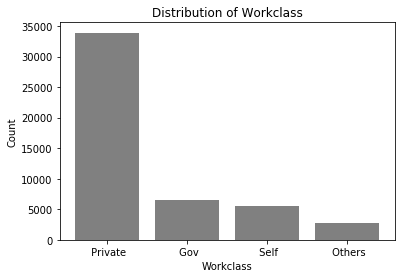

In [6]:
# Plot the result after grouping
workclass_x = x_data['Workclass'].value_counts().keys().to_list()
workclass_num = x_data['Workclass'].value_counts().to_list()

plt.bar( workclass_x, workclass_num, color = 'grey')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Distribution of Workclass')
plt.show()
plt.close()

<font color = blue>  3. *Education* & *Education_Num* & *Hours_per_week* --- delete Education to prevent colinearity and do feature engineering

In [7]:
# Observe the categories of Education and the counts
x_data['Education'].value_counts(dropna=False)

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: Education, dtype: int64

In [8]:
# Test if Education and Education_Num are 1 to 1 mapping
print("Doctorate: ", x_data.loc[ x_data.Education == ' Doctorate']['Education_Num'].value_counts())
print("Prof-school: ", x_data.loc[ x_data.Education == ' Prof-school']['Education_Num'].value_counts())
print("Masters: ", x_data.loc[ x_data.Education == ' Masters']['Education_Num'].value_counts())
print("Bachelors: ", x_data.loc[ x_data.Education == ' Bachelors']['Education_Num'].value_counts())
print("Assoc-acdm: ", x_data.loc[ x_data.Education == ' Assoc-acdm']['Education_Num'].value_counts())
print("Assoc-voc: ", x_data.loc[ x_data.Education == ' Assoc-voc']['Education_Num'].value_counts())
print("Some-college: ", x_data.loc[ x_data.Education == ' Some-college']['Education_Num'].value_counts())
print("HS-grad: ",x_data.loc[ x_data.Education == ' HS-grad']['Education_Num'].value_counts())
print("12th: ", x_data.loc[ x_data.Education == ' 12th']['Education_Num'].value_counts())
print("11th: ", x_data.loc[ x_data.Education == ' 11th']['Education_Num'].value_counts())
print("10th: ", x_data.loc[ x_data.Education == ' 10th']['Education_Num'].value_counts())
print("9th: ", x_data.loc[ x_data.Education == ' 9th']['Education_Num'].value_counts())
print("7th-8th: ", x_data.loc[ x_data.Education == ' 7th-8th']['Education_Num'].value_counts())
print("5th-6th: ", x_data.loc[ x_data.Education == ' 5th-6th']['Education_Num'].value_counts())
print("1st-4th: ", x_data.loc[ x_data.Education == ' 1st-4th']['Education_Num'].value_counts())
print("Preschool: ", x_data.loc[ x_data.Education == ' Preschool']['Education_Num'].value_counts())

Doctorate:  16    594
Name: Education_Num, dtype: int64
Prof-school:  15    834
Name: Education_Num, dtype: int64
Masters:  14    2657
Name: Education_Num, dtype: int64
Bachelors:  13    8025
Name: Education_Num, dtype: int64
Assoc-acdm:  12    1601
Name: Education_Num, dtype: int64
Assoc-voc:  11    2061
Name: Education_Num, dtype: int64
Some-college:  10    10878
Name: Education_Num, dtype: int64
HS-grad:  9    15784
Name: Education_Num, dtype: int64
12th:  8    657
Name: Education_Num, dtype: int64
11th:  7    1812
Name: Education_Num, dtype: int64
10th:  6    1389
Name: Education_Num, dtype: int64
9th:  5    756
Name: Education_Num, dtype: int64
7th-8th:  4    955
Name: Education_Num, dtype: int64
5th-6th:  3    509
Name: Education_Num, dtype: int64
1st-4th:  2    247
Name: Education_Num, dtype: int64
Preschool:  1    83
Name: Education_Num, dtype: int64


In [9]:
# Delete Education column from data set because they are 1 to 1 mapping
x_data = x_data.drop("Education", axis = 1)

<font color = green> From the correlation table, I found that Education_Num and Hours_per_week have higher correlation with Target.   
    Hence, I'd like to add a cross-multiplying terms as Edu*Hr.

In [10]:
x_data['Edu*Hr'] = x_data['Education_Num']*x_data['Hours_per_week']
x_data.head()

,Age,Workclass,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Edu*Hr
0,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,450
1,18,Others,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,300
2,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,180
3,29,Others,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,360
4,55,Private,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,40


<font color = blue> 4. *Martial_Status* --- dealing with missing value and group the data

In [11]:
# Observe the categories of Martial_Status
x_data['Martial_Status'].value_counts(dropna = False)

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: Martial_Status, dtype: int64

<font color = green> Since the number of *Married-spouse-absent* and *Married-AF-spouse* are relatively low, I group them with *Married-civ-spouse* into the group *Married*.

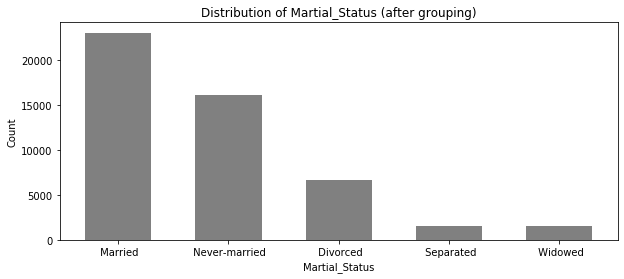

In [12]:
# Group the data
Married = [' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse']
x_data['Martial_Status'] = x_data['Martial_Status'].replace(Married, ' Married')

# Plot the result after grouping
mar_x = x_data['Martial_Status'].value_counts(dropna = False).keys().to_list()
mar_cnt = x_data['Martial_Status'].value_counts(dropna = False).to_list()

plt.figure(figsize=(10,4))
plt.bar( mar_x, mar_cnt, color = 'grey', width = 0.6)
plt.xlabel('Martial_Status')
plt.ylabel('Count')
plt.title('Distribution of Martial_Status (after grouping)')
plt.show()
plt.close()

<font color = blue> 5. *Occupation* --- dealing with missing value

In [13]:
# Observe the categories of Occupation
print(x_data['Occupation'].value_counts(dropna=False))

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
NaN                   2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: Occupation, dtype: int64


In [14]:
# Fill missing values with Other-service
x_data['Occupation'] = x_data['Occupation'].fillna( value = ' Other-service')

<font color = blue> 6. *Country* --- dealing with missing values and group the data

In [15]:
# Observe the categories of Country
print(x_data['Country'].value_counts(dropna=False))

 United-States                 43832
 Mexico                          951
NaN                              857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Nicaragua                        49
 Greece                           49
 

In [16]:
# Fill nan values with United-States
x_data['Country'] = x_data['Country'].fillna( value = ' United-States')

# Group the data, except United-States, Maxico, Canada, and South, by their locations
x_data['Country'] = x_data['Country'].replace([' Philippines', ' India', ' Vietnam', ' Thailand', ' Laos', ' Cambodia', ' Iran'] ,' SE-Asia')
x_data['Country'] = x_data['Country'].replace([' China', ' Taiwan', ' Japan', ' Hong'] ,' E-Asia')
x_data['Country'] = x_data['Country'].replace([' Germany', ' England', ' Italy', ' Poland', ' Portugal',' Greece',' France',' Ireland',
                                               ' Yugoslavia',' Scotland',' Hungary', ' Holand-Netherlands'] ,' Europe')
x_data['Country'] = x_data['Country'].replace([' Puerto-Rico', ' El-Salvador', ' Cuba', ' Jamaica', ' Dominican-Republic', ' Guatemala', ' Haiti',
                                               ' Nicaragua',' Trinadad&Tobago',' Honduras'] ,' Central-America')
x_data['Country'] = x_data['Country'].replace([' Columbia',' Peru',' Ecuador' ] 
                                              ,' South-America')
x_data['Country'] = x_data['Country'].replace([' Outlying-US(Guam-USVI-etc)' ] ,' United-States')

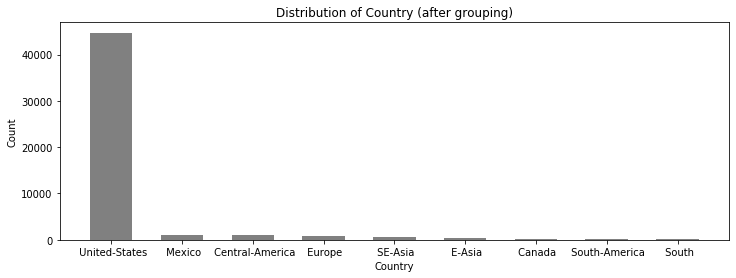

In [17]:
# Plot the result after grouping
cty_x = x_data['Country'].value_counts(dropna=False).keys().to_list()
cty_cnt = x_data['Country'].value_counts(dropna=False).to_list()

plt.figure(figsize=(12,4))
plt.bar( cty_x, cty_cnt, color = 'grey', width = 0.6)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country (after grouping)')
plt.show()
plt.close()

<font color = blue> 7. *Target* --- unbalanced data

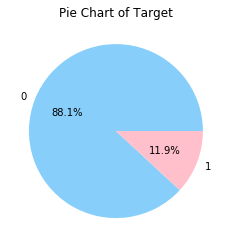

In [18]:
# Plot the pie chart of Target in training set
target_x = [0,1]
num_1 = sum(y_train['Target'])
num_0 = len(y_train['Target']) - num_1
target_cnt = [ num_0, num_1]

plt.figure(figsize=(4,4))
plt.pie( target_cnt, labels = target_x, colors = ['lightskyblue', 'pink'], autopct = "%1.1f%%",)
plt.title('Pie Chart of Target')
plt.show()
plt.close()

<font color = green> The pie chart shows that the target distribution is "unbalanced".  
    Besides, after submitting "sub_try.csv", which with all target labeled 1, I got accuracy = 0.59 on Kaggle.  
    I reasonably guessed that the distribution of target in the testing set is not that unbalanced like in the training set.  
    Hence, we need to tackle **unbalanced data problem** later when building the model!

<font color = blue>**Step 3: One-hot-encoding**

In [19]:
# Transfer all categorical data using one-hot-encoding
x_data_ohe = pd.get_dummies( x_data, drop_first=True ) # drop_first = True can avoid colinearity!
pd.set_option('display.max_columns',47)
x_data_ohe.head(2)

,Age,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Edu*Hr,Workclass_ Others,Workclass_ Private,Workclass_ Self,Martial_Status_ Married,Martial_Status_ Never-married,Martial_Status_ Separated,Martial_Status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Country_ Central-America,Country_ E-Asia,Country_ Europe,Country_ Mexico,Country_ SE-Asia,Country_ South,Country_ South-America,Country_ United-States
0,38,9,0,0,50,450,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1,18,10,0,0,30,300,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


<font color = blue> **Step 4. Standardization**

In [20]:
# Split x_data_ohe back into training and testing data(as the same as the sets in the beginning
x_train_ohe = x_data_ohe[:29514]
x_test_ohe = x_data_ohe[29514:]

In [21]:
# Use StandardScaler(), fit it with training data and use it the tranform both training and testing data
from sklearn.preprocessing import StandardScaler
numerical_feature = ['Age', 'Education_Num', 'Capital_Gain','Capital_Loss','Hours_per_week', 'Edu*Hr']
scalar = StandardScaler().fit( x_train_ohe[numerical_feature] )

x_train_ohe[ numerical_feature ] = scalar.transform( x_train_ohe[ numerical_feature ])
x_test_ohe[ numerical_feature ] = scalar.transform( x_test_ohe[ numerical_feature ])

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [22]:
# Ensure the means have been tranferred to nearly zero
x_train_ohe[numerical_feature].mean(axis = 0)

Age              -3.996186e-16
Education_Num     5.073325e-16
Capital_Gain     -9.794481e-18
Capital_Loss     -2.428298e-16
Hours_per_week    1.489175e-16
Edu*Hr           -3.266871e-16
dtype: float64

In [23]:
# Convert dataframe into numpy array for keras model
x_train_np = x_train_ohe.values
x_test_np = x_test_ohe.values
y_train = y_train.values

# Convert y_train into categorical data
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_train

Using TensorFlow backend.


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

**<font color = blue>Step 5: Building model**

In [50]:
# Separate training set into partial training data and validation data
x_val = x_train_np[-6000:]
partial_x_train = x_train_np[:-6000]
y_val = y_train[-6000:]
partial_y_train = y_train[:-6000]

<font color = green> As mentioned above, we need to tackle unbalanced data problem.    
    I have two steps to complete that.  
    $\quad$ 1. Adjust the weights on 0 and 1 targets in training set when training model  
    $\quad$ 2. Adjust the validation set into a balanced data set

In [58]:
import keras as keras
from keras import models
from keras import layers

In [65]:
# Create neural network model by keras
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(44,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [66]:
# To tackle unbalanced data issue, I set the weight of 0 as 0.135 with respect to the weight of 1
# 0.135 comes from the approximate ratio of (targets=1)/(targets=0) in the training set

from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(partial_y_train, axis=1)
dic_weight = {0:0.135, 1:1}
class_weights = compute_class_weight(dic_weight, np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

In [67]:
keras.optimizers.RMSprop(learning_rate=0.000001)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],)

In [68]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=2000,
                    validation_data=(x_val, y_val),
                    verbose=2, class_weight=d_class_weights)

Train on 23514 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.1492 - accuracy: 0.6509 - val_loss: 0.5979 - val_accuracy: 0.7320
Epoch 2/15
 - 0s - loss: 0.1159 - accuracy: 0.7615 - val_loss: 0.4500 - val_accuracy: 0.7955
Epoch 3/15
 - 0s - loss: 0.1007 - accuracy: 0.7834 - val_loss: 0.3852 - val_accuracy: 0.8197
Epoch 4/15
 - 0s - loss: 0.0954 - accuracy: 0.7919 - val_loss: 0.3602 - val_accuracy: 0.8245
Epoch 5/15
 - 0s - loss: 0.0928 - accuracy: 0.7966 - val_loss: 0.4245 - val_accuracy: 0.7828
Epoch 6/15
 - 0s - loss: 0.0914 - accuracy: 0.7967 - val_loss: 0.4045 - val_accuracy: 0.7932
Epoch 7/15
 - 0s - loss: 0.0900 - accuracy: 0.7983 - val_loss: 0.3999 - val_accuracy: 0.7985
Epoch 8/15
 - 0s - loss: 0.0895 - accuracy: 0.8009 - val_loss: 0.3698 - val_accuracy: 0.8132
Epoch 9/15
 - 0s - loss: 0.0893 - accuracy: 0.7977 - val_loss: 0.3749 - val_accuracy: 0.8110
Epoch 10/15
 - 0s - loss: 0.0887 - accuracy: 0.8011 - val_loss: 0.4132 - val_accuracy: 0.7892
Epoch 11/15
 - 0s - 

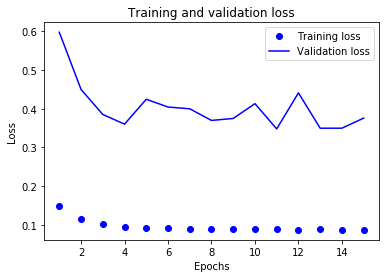

In [69]:
# Plot the loss value
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

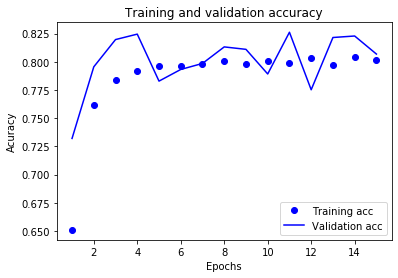

In [70]:
# plot the accuracy rate
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acuracy')
plt.legend()
plt.show()

In [32]:
# Predict on the test set
predictions = model.predict(x_test_np)

# Determine the final predictions by choosing the index of larger value in predictions array
predictions_final = np.argmax(predictions, axis = 1)

# Convert predictions array into dataframe and combine it with ID
target = pd.DataFrame(predictions_final, dtype = int, columns = ['Target'])
sub = x_test['ID']
sub = pd.concat( [sub, target], axis=1 )

In [33]:
# Export the result into csv file
pd.DataFrame(sub).to_csv("sub_last_1.csv",index = False)